## STAT3612: Statistical Machine Learning
### Assignment 1: Python basics and logistic regression
### DUE: Oct 13, 2024, Sunday, 11:59 PM

In [2]:
# TODO: please make sure you have Python 3.6+
# please install these packages:
! pip install -q numpy pandas matplotlib seaborn scikit-learn umap-learn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import umap

sns.set_style("darkgrid")

C:\Users\swqwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Part 1 Q2b graph

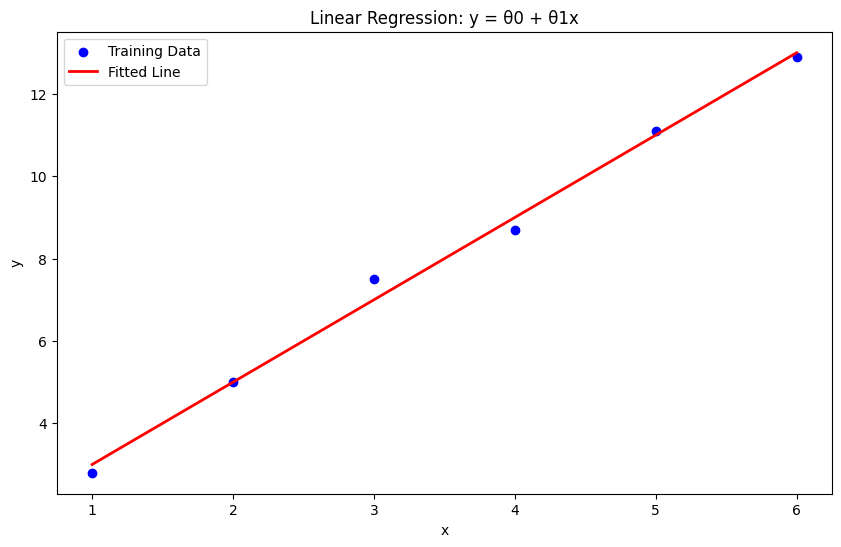

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data (6x1 matrices)
x = np.array([[1], [2], [3], [4], [5], [6]])
y = np.array([[2.8], [5], [7.5], [8.7], [11.1], [12.9]])

# Fit the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(x, y)

# Predict the values for the training set
y_pred = lin_reg.predict(x)

# Plot the training data and the fitted line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Training Data')
plt.plot(x, y_pred, color='red', linewidth=2, label='Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression: y = θ0 + θ1x')
plt.legend()
plt.show()

#### Part 2: Python and NumPy basics

In [4]:
file_path = "Employee-Attrition-Classification.csv"
col_names = ["Age", "Years at Company",  "Monthly Income", 
             "Distance from Home", "Company Tenure", "Number of Promotions",
             "Number of Dependents", "Attrition"]

# Q3 (a)  

# ------------------
dfa = pd.read_csv(file_path, usecols=col_names)

dfa['Attrition'] = dfa['Attrition'].map({'Stayed': 1, 'Left': 0})

print(dfa.head())
# ------------------

   Age  Years at Company  ...  Company Tenure  Attrition
0   31                19  ...              89          1
1   59                 4  ...              21          1
2   24                10  ...              74          1
3   36                 7  ...              50          1
4   56                41  ...              68          1

[5 rows x 8 columns]


In [5]:
# Q3 (b)  

attr_names = ["Age", "Years at Company",  "Monthly Income", 
             "Distance from Home", "Company Tenure", "Number of Promotions",
             "Number of Dependents"]

# ------------------
df = pd.read_csv(file_path, usecols=attr_names)

stats = df.describe()

print(stats)
# ------------------

                Age  Years at Company  ...  Number of Dependents  Company Tenure
count  59598.000000      59598.000000  ...          59598.000000    59598.000000
mean      38.565875         15.753901  ...              1.648075       55.758415
std       12.079673         11.245981  ...              1.555689       25.411090
min       18.000000          1.000000  ...              0.000000        2.000000
25%       28.000000          7.000000  ...              0.000000       36.000000
50%       39.000000         13.000000  ...              1.000000       56.000000
75%       49.000000         23.000000  ...              3.000000       76.000000
max       59.000000         51.000000  ...              6.000000      128.000000

[8 rows x 7 columns]


In [6]:
# Q3 (c)  

# ------------------
corr_matrix = df.corr()

print(corr_matrix)
# ------------------

                           Age  ...  Company Tenure
Age                   1.000000  ...        0.237048
Years at Company      0.539806  ...        0.442180
Monthly Income       -0.001989  ...       -0.005397
Number of Promotions  0.000167  ...        0.003903
Distance from Home   -0.007063  ...       -0.005595
Number of Dependents  0.002927  ...        0.001600
Company Tenure        0.237048  ...        1.000000

[7 rows x 7 columns]


In [7]:
# Q3 (d)  

attr_names = ["Age", "Years at Company",  "Monthly Income", 
             "Distance from Home", "Company Tenure", "Number of Promotions",
             "Number of Dependents"]

# ------------------
df_standardized = (df - df.mean()) / df.std()

print(df_standardized.head())
# ------------------

        Age  Years at Company  ...  Number of Dependents  Company Tenure
0 -0.626331          0.288645  ...             -1.059386        1.308153
1  1.691612         -1.045165  ...              0.869020       -1.367844
2 -1.205817         -0.511641  ...              0.869020        0.717859
3 -0.212413         -0.778403  ...              0.226218       -0.226610
4  1.443261          2.244900  ...             -1.059386        0.481742

[5 rows x 7 columns]


In [8]:
# Q3 (e)
from sklearn.model_selection import train_test_split

# ------------------
train_df, test_df = train_test_split(df_standardized, test_size=0.2, random_state=42)

train_mean = train_df.mean()
train_std = train_df.std()

train_df_standardized = (train_df - train_mean) / train_std
test_df_standardized = (test_df - train_mean) / train_std

print(train_df_standardized.head())
print("\n")
print(test_df_standardized.head())
# ------------------

            Age  Years at Company  ...  Number of Dependents  Company Tenure
10250  1.694967         -0.333756  ...              2.152598       -0.620400
42948  0.040398         -0.067262  ...             -0.418430       -0.462655
57139  0.619497          0.998714  ...              1.509841        1.942952
25623 -1.283257         -0.156093  ...              0.224327        1.430281
20424 -0.207788         -0.422587  ...             -1.061187        0.286632

[5 rows x 7 columns]


            Age  Years at Company  ...  Number of Dependents  Company Tenure
47848 -0.786887         -0.511418  ...             -1.061187       -0.147166
15550 -1.696900         -1.133237  ...              0.867084       -0.226038
4448  -0.704158         -0.600249  ...              1.509841        0.247196
52577  0.619497         -1.222069  ...             -1.061187       -0.659836
6072  -0.125059          0.110401  ...             -0.418430       -0.541527

[5 rows x 7 columns]


We should calculate the mean and std only rely on training data, as testing data is considered as not known during training.

#### Part 2: Data visualization

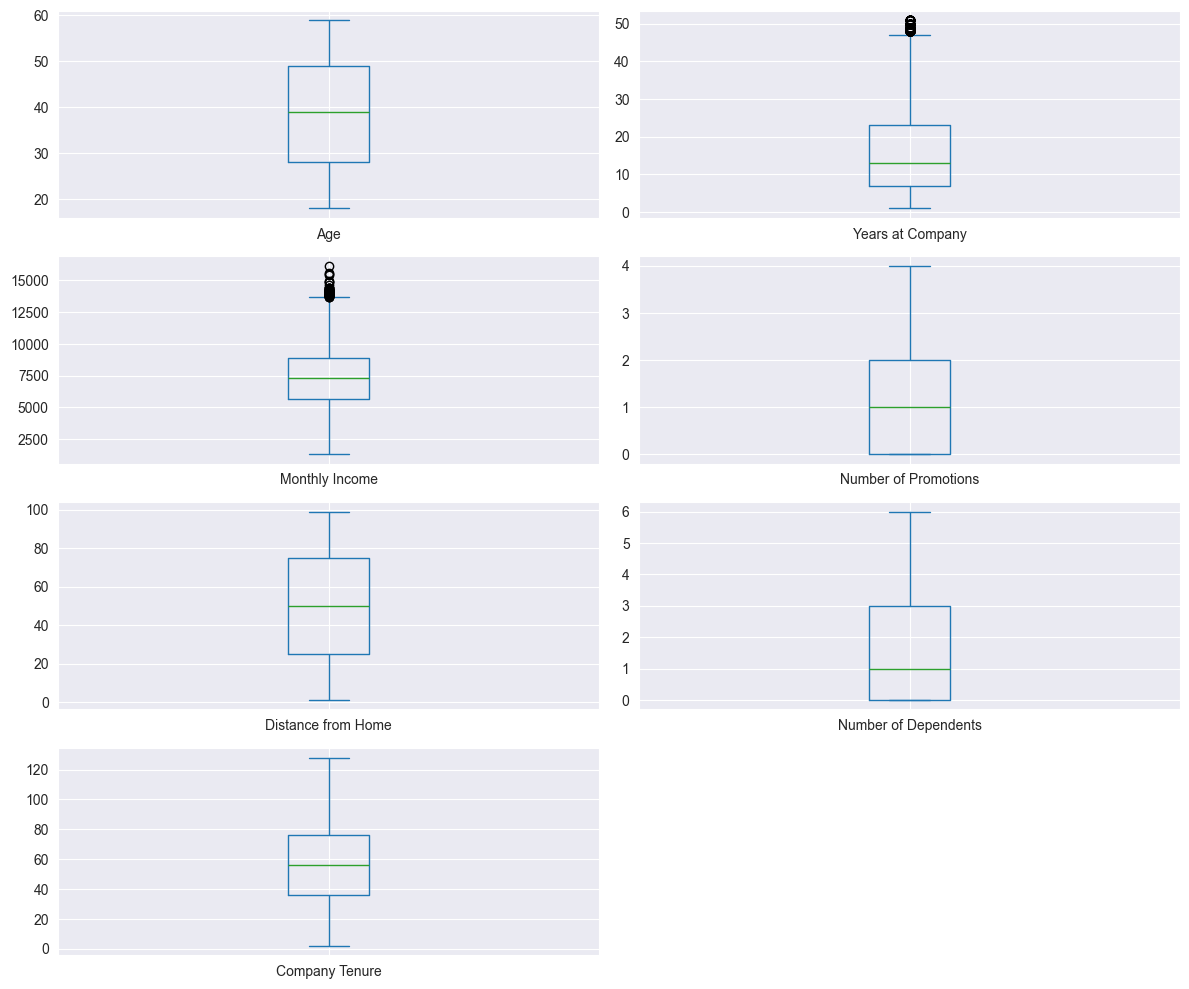

In [9]:
# Q4 (a)  

# ------------------
df.plot(kind='box', subplots=True, layout=(4, 2), figsize=(12, 10))
plt.tight_layout()
plt.show()
# ------------------

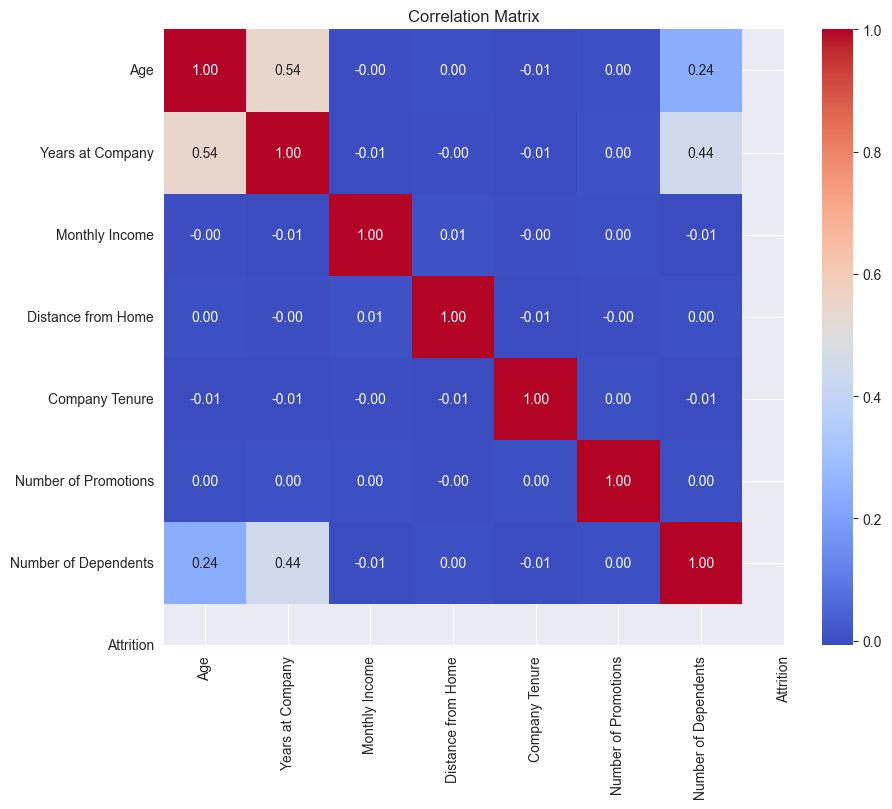

In [10]:
# Q4 (b)
#  -------------------
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=col_names, yticklabels=col_names)
plt.title('Correlation Matrix')
plt.show()
# -------------------

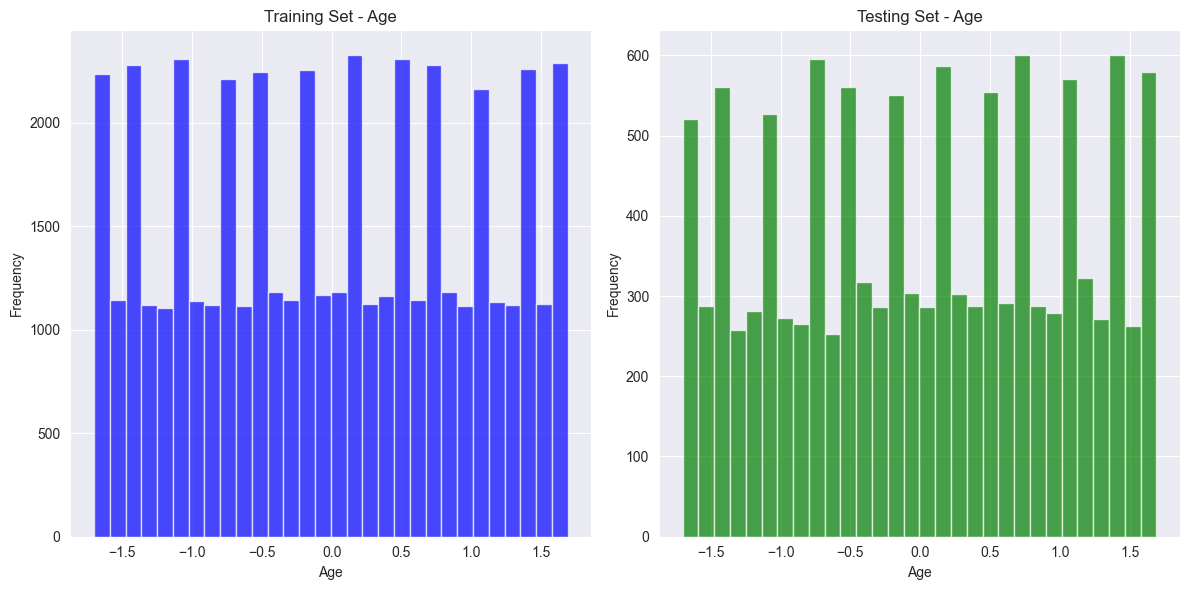

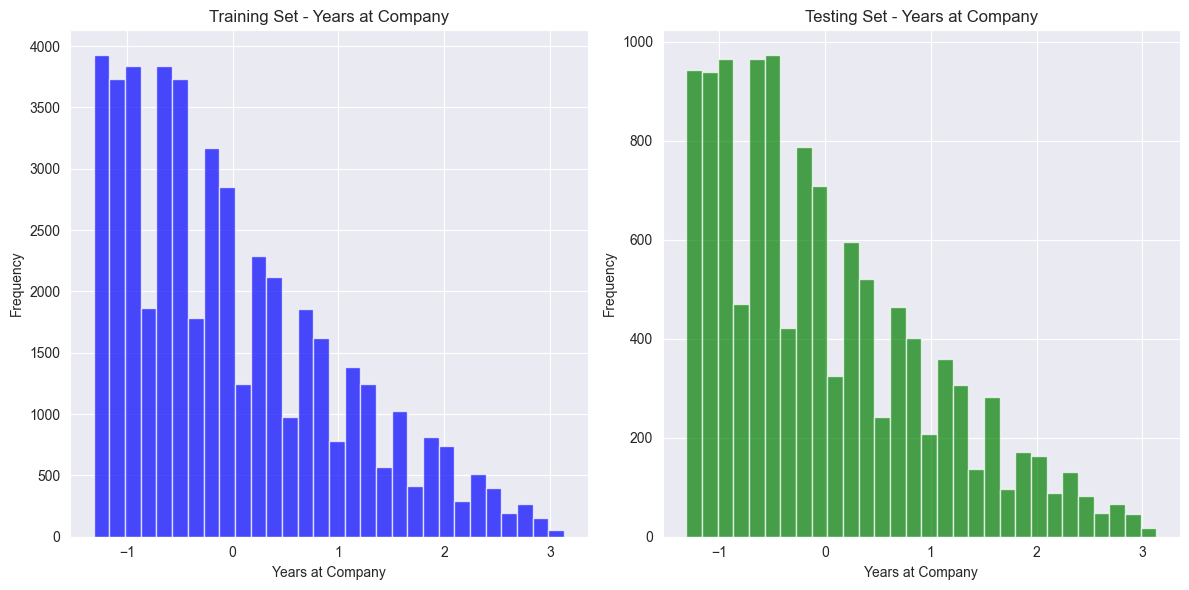

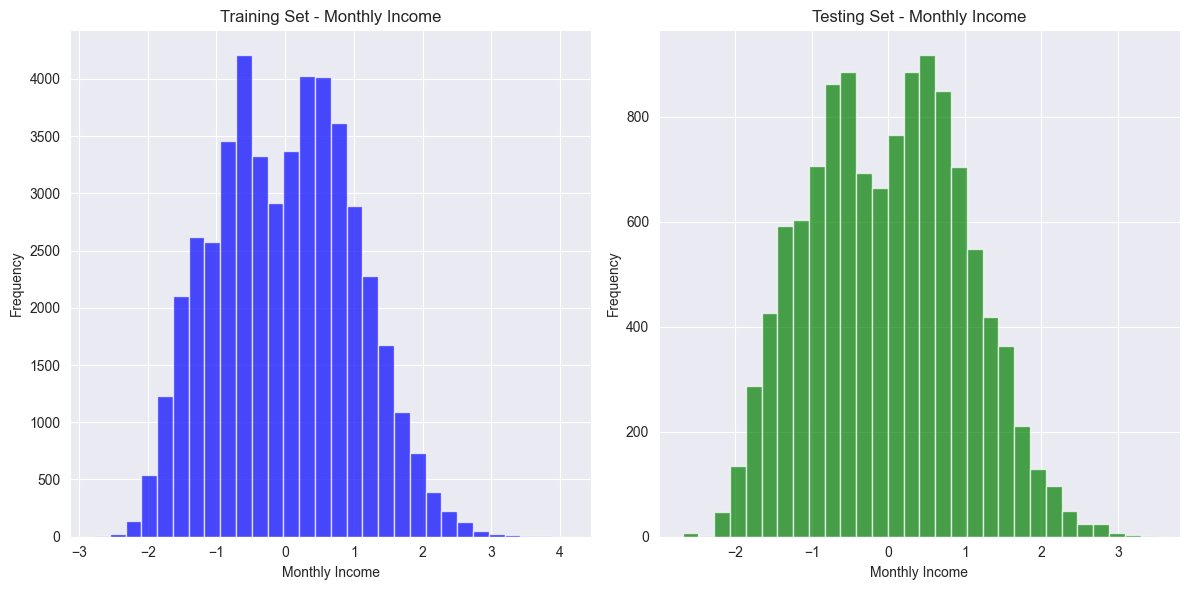

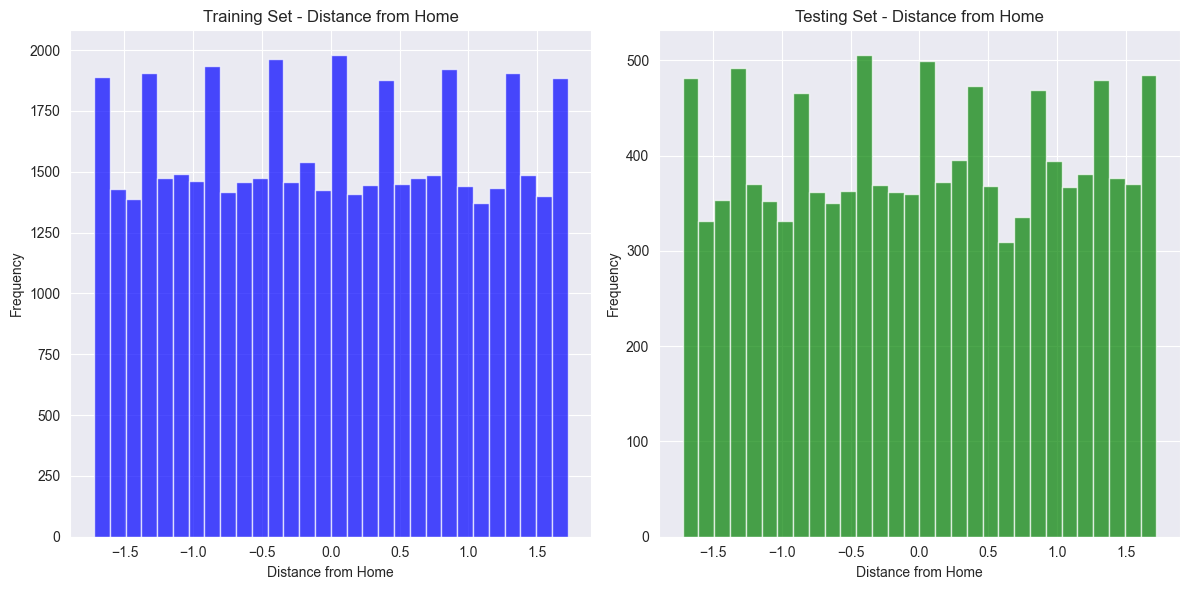

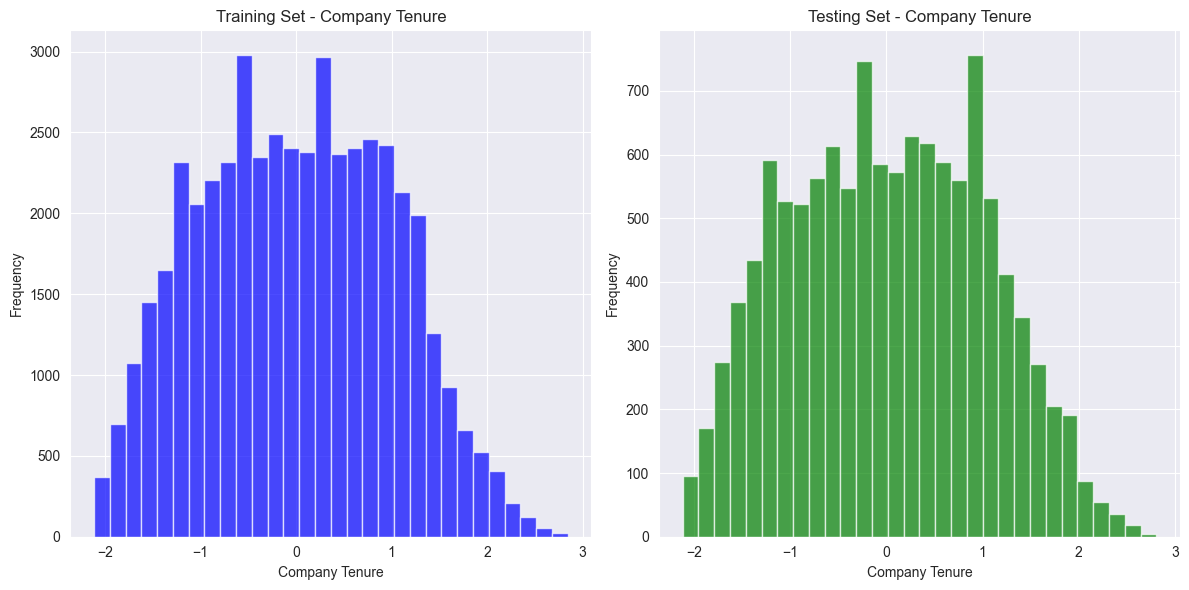

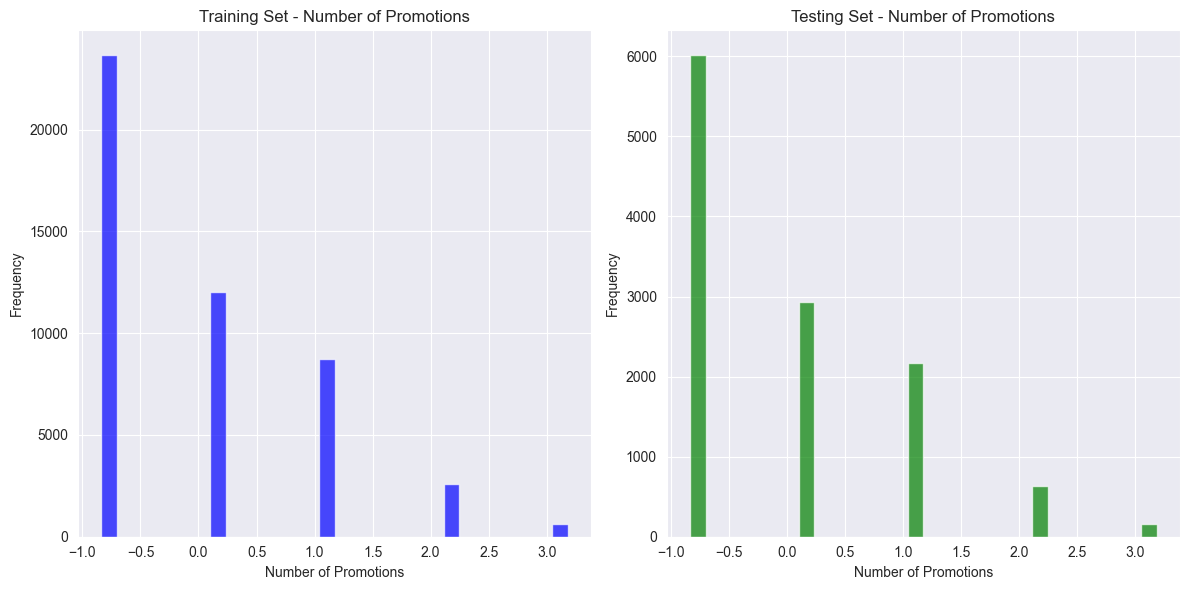

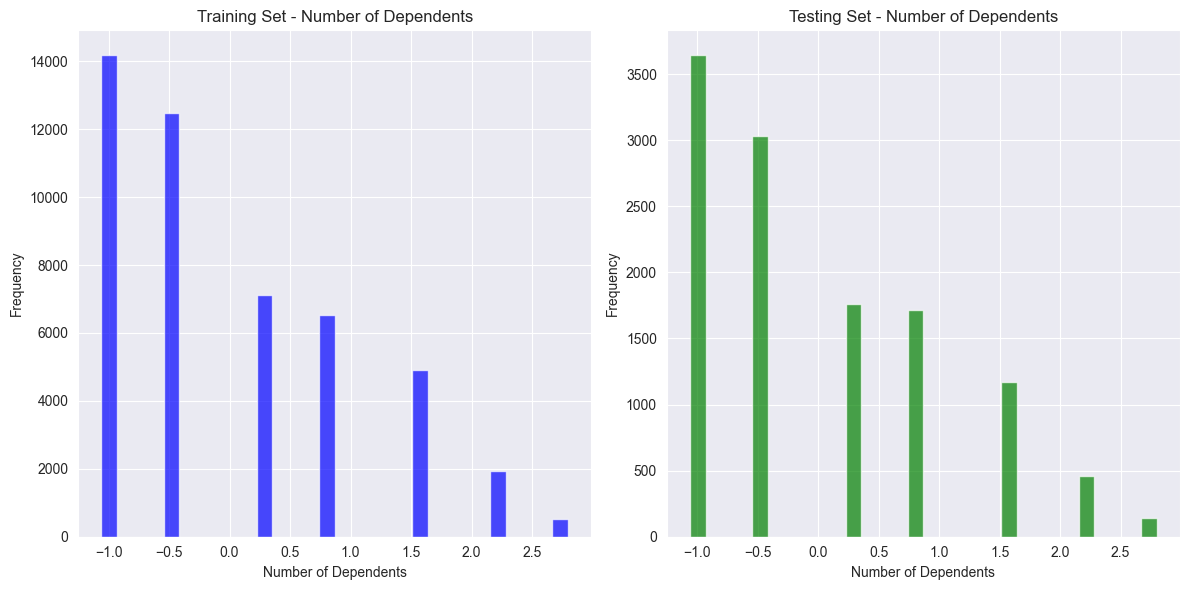

In [11]:
# Q4 (c)
#  -------------------
for attribute in attr_names:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(train_df[attribute], bins=30, alpha=0.7, color='blue')
    plt.title(f'Training Set - {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(test_df[attribute], bins=30, alpha=0.7, color='green')
    plt.title(f'Testing Set - {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
#  -------------------

#### Part 3: Logistic regression

In [12]:
# Q5 (a)

train_columns = ["Age", "Years at Company",  "Monthly Income", 
             "Distance from Home", "Company Tenure", "Number of Promotions",
             "Number of Dependents"]
test_columns = ["Attrition"]

# -------------------
cols = train_columns + test_columns
df5 = pd.read_csv(file_path, usecols=cols)
df5['Attrition'] = df5['Attrition'].map({'Stayed': 1, 'Left': 0})

train_df5, test_df5 = train_test_split(df5, test_size=0.2, random_state=42)

X_train = train_df5[train_columns]
y_train = train_df5['Attrition']

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

coefficients = log_reg.coef_[0]
print(coefficients)
# -------------------

[ 2.85076075e-03  1.04783374e-02  8.49312340e-06 -6.70362747e-03
  2.33955084e-05  1.70876371e-01  1.07981534e-01]


 Q5 (b)
 
Features positive affecting the output are: age; years at company; monthly income; company tenure; number of promotions; number of dependents.

Features negatively affecting the output are: distance from home.

Of all the positive features, number of promotions and number of dependents are the two most significant feature for employees to stay. It is reasonable to common sense as more promotions leads to higher job satisfaction and employees with more dependents might emphasize on job stability, both leading to higher chances of staying with the company.

As for the remaining positive features, they have small or negligible effects on an employee staying with the company. Age and years at company would build a sense of loyalty to the company as it increases, hence it having a positive effect is reasonable.

However, I am surprised company tenure and monthly income has such a small coefficient. According to common sense, achieving tenure at a company would suggest loyalty and privileges leading to a higher coefficient while a higher monthly income would increase the satisfaction of the employee and be willing to stay with the company.

One feature negatively affects the output and it is reasonable as well. For employees that live far from work, longer commutes can lead to dissatisfaction and lead to a lower willingness to stay with the company.

In [13]:
# Q5 (c)

# -------------------
X_test = test_df5[train_columns]
y_test = test_df5['Attrition']

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(y_train, y_train_pred, average='binary')

test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='binary')

print("Training Set Metrics:")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")

print("\nTesting Set Metrics:")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")
# -------------------

Training Set Metrics:
Precision: 0.58
Recall: 0.66
F1 Score: 0.61

Testing Set Metrics:
Precision: 0.57
Recall: 0.65
F1 Score: 0.61


In [23]:
# Q5 (d)
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler

# -------------------
train_columns = ["Age", "Years at Company",  "Monthly Income", 
                 "Distance from Home", "Company Tenure", "Number of Promotions",
                 "Number of Dependents", "Job Level", "Performance Rating", "Job Satisfaction"]	
test_columns = ["Attrition"]

cols = train_columns + test_columns
df5d = pd.read_csv(file_path, usecols=cols)
df5d['Attrition'] = df5d['Attrition'].map({'Stayed': 1, 'Left': 0})

label_encoders = {}
cat_columns = ["Job Level", "Performance Rating", "Job Satisfaction"]

for col in cat_columns:
    le = LabelEncoder()
    df5d[col] = le.fit_transform(df5d[col])
    label_encoders[col] = le

train_df5d, test_df5d = train_test_split(df5d, test_size=0.2, random_state=42)

X_train = train_df5d[train_columns]
y_train = train_df5d['Attrition']
X_test = test_df5d[train_columns]
y_test = test_df5d['Attrition']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

log_reg = LogisticRegression(max_iter=1000, penalty='l2', C=0.1)
log_reg.fit(X_train_poly, y_train)

y_train_pred = log_reg.predict(X_train_poly)
y_test_pred = log_reg.predict(X_test_poly)

train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(y_train, y_train_pred, average='binary')

test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='binary')

print("Training Set Metrics:")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print("\nTesting Set Metrics:")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")
# -------------------

Training Set Metrics:
Precision: 0.66
Recall: 0.68
F1 Score: 0.67

Testing Set Metrics:
Precision: 0.66
Recall: 0.68
F1 Score: 0.67


Used label encoding to convert categorical data to numerical data. Standarized data for improving the convergence of the logistic regression model. Used polynomial features to create interaction terms between the attributes to record the effect of multiple features on the target variable. Used L2 regulization to prevent overfitting.